<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/EfficientNetB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 27.28 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (90503/90503), done.


In [2]:
import os

# Diretório raiz
root_directory = '/content/Fruit-Images-Dataset/Validation'

# Lista de subpastas
subfolders = [
    'apple_6',
    'apple_braeburn_1',
    'apple_crimson_snow_1',
    'apple_golden_1',
    'apple_golden_2',
    'apple_golden_3',
    'apple_granny_smith_1',
    'apple_hit_1',
    'apple_pink_lady_1',
    'apple_red_1',
    'apple_red_2',
    'apple_red_3',
    'apple_red_delicious_1',
    'apple_red_yellow_1',
    'apple_rotten_1',
    'cabbage_white_1',
    'carrot_1',
    'cucumber_1',
    'cucumber_3',
    'eggplant_violet_1',
    'pear_1',
    'pear_3',
    'zucchini_1',
    'zucchini_dark_1'
]

# Crie a estrutura de pastas
for folder in subfolders:
    folder_path = os.path.join(root_directory, folder)
    os.makedirs(folder_path, exist_ok=True)

In [3]:
# Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path

# ML Imports
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

In [4]:
# Setting a seed to tf to maintain results consistent
tf.random.set_seed(4)

In [5]:
train_data = Path(r'/content/Fruit-Images-Dataset/Test')
train_data = Path(r'/content/Fruit-Images-Dataset/Training')
train_data = Path(r'/content/Fruit-Images-Dataset/Validation')

In [34]:
import os
from pathlib import Path

# Path to the training data directory
train_data = Path('/content/Fruit-Images-Dataset/Training')

# List of training image file paths, converted to strings
training_images = [str(image) for image in train_data.glob('*/*')]

# Extract just the image file names
image_names = [os.path.basename(image) for image in training_images]

# Display the first few image names
print(image_names[925:936])

# Get the total number of images
total_images = len(image_names)
print(total_images)

['277_100.jpg', '267_100.jpg', '209_100.jpg', '263_100.jpg', '142_100.jpg', '174_100.jpg', 'r_255_100.jpg', 'r_263_100.jpg', 'r_305_100.jpg', '24_100.jpg', '318_100.jpg']
67692


In [44]:
train_images_label[925:936]


['Label not found',
 'Label not found',
 'Label not found',
 'Label not found',
 'Label not found',
 'Label not found',
 'Label not found',
 'Label not found',
 'Label not found',
 'Label not found',
 'Label not found']

In [45]:
training_images = list(train_data.glob('*/*'))

In [46]:
training_images[925:936]

[PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/277_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/267_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/209_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/263_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/142_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/174_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/r_255_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/r_263_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/r_305_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/24_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/318_100.jpg')]

In [47]:
training_images = list(map(lambda x: str(x), training_images))

In [48]:
training_images[925:936]

['/content/Fruit-Images-Dataset/Training/Clementine/277_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/267_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/209_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/263_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/142_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/174_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/r_255_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/r_263_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/r_305_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/24_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/318_100.jpg']

In [49]:
len(training_images)

67692

In [64]:
def labelExtraction(image_path):
    # Divida a path com base na barra '/'
    path_parts = image_path.split("/")
    # O rótulo estará na penúltima parte (índice -2)
    return path_parts[-2]

train_images_label = list(map(lambda x: labelExtraction(x), training_images))
train_images_label[925:936]

['Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine']

In [65]:
encoder = LabelEncoder()

In [66]:
train_images_label = encoder.fit_transform(train_images_label)

In [67]:
train_images_label[925:936]

array([33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33])

In [68]:
train_images_label = tf.keras.utils.to_categorical(train_images_label)

In [69]:
train_images_label[925:936]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
# Dividing Train and Valid data
X_train, X_valid, y_train, y_valid = train_test_split(training_images,
train_images_label)

In [72]:
X_train[15:18]

['/content/Fruit-Images-Dataset/Training/Pepper Yellow/r2_108_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Cocos/r_257_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Plum 3/r3_193_100.jpg']

In [73]:
y_train[15:18]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [82]:
import os
import tensorflow as tf

# Diretório raiz onde suas imagens estão localizadas
diretorio_raiz = "/content/Fruit-Images-Dataset/Training"

# Tamanho desejado para as imagens redimensionadas
img_size = 224

# Crie um modelo de redimensionamento
resize = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Resizing(img_size, img_size)])

# Percorra todas as pastas e subpastas
for raiz, diretorios, arquivos in os.walk(diretorio_raiz):
    for arquivo in arquivos:
        # Verifique se o arquivo é uma imagem (você pode adicionar mais extensões, se necessário)
        if arquivo.endswith(".jpg") or arquivo.endswith(".png"):
            imagem_path = os.path.join(raiz, arquivo)
            # Carregue a imagem
            imagem = tf.keras.preprocessing.image.load_img(imagem_path)
            # Redimensione a imagem
            imagem_redimensionada = resize(imagem)
            # Salve a imagem redimensionada de volta no mesmo local
            tf.keras.preprocessing.image.save_img(imagem_path, imagem_redimensionada)

print("Todas as imagens foram redimensionadas com sucesso.")

Todas as imagens foram redimensionadas com sucesso.


In [83]:
# Creating an object to dataset augmentation
data_augmentation = tf.keras.Sequential([RandomFlip("horizontal"),
                                         RandomRotation(0.2),
                                         RandomZoom(height_factor = (-0.3,-0.2))])

In [84]:
# Hyperparameters
batch_size = 32
autotune = tf.data.experimental.AUTOTUNE

In [85]:
# FLoad and Transform images
def loadTransform(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    return image, label

In [86]:
# Set data to tf formatation
def prepareDataset(path, labels, train = True):

    # PPrepare the data
    image_paths = tf.convert_to_tensor(path)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
    dataset = dataset.map(lambda image, label: loadTransform(image, label))
    dataset = dataset.map(lambda image, label:
                          (resize(image), label), num_parallel_calls = autotune)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)

    # If train == True, apply image augmentation
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls = autotune)

    # If train == False repeat the dataset and return
    dataset = dataset.repeat()

    return dataset

In [87]:
# Train dataset
train_dataset = prepareDataset(X_train, y_train)

In [88]:
# Shape
image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Watermelon


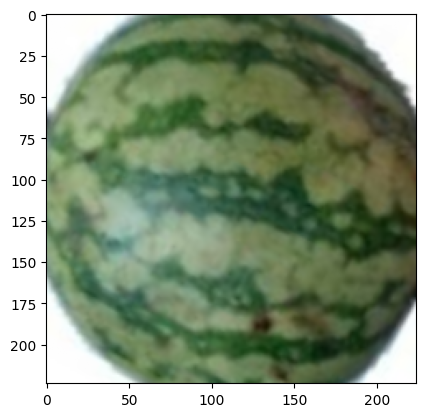

In [89]:
# Viewing an image and it's label
print(encoder.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224,224,3))

In [90]:
# Cria o dataset de validação
valid_dataset = prepareDataset(X_valid, y_valid, train = False)

In [91]:
# Shape
image, label = next(iter(valid_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Pear Abate


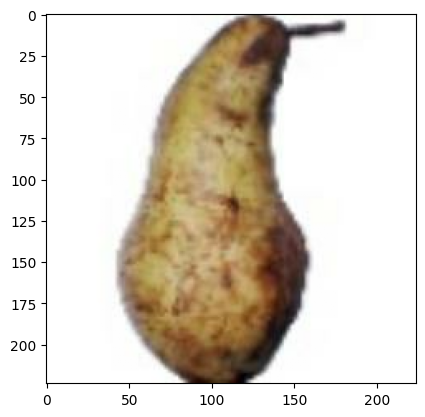

In [92]:
# Viewing an image and it's label
print(encoder.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224,224,3))

In [93]:
#Deep learning Model
https://www.kaggle.com/code/jonathansaccomano/fruits-image-classification/notebook